In [7]:
import numpy as np
import os
from py_helpers import *
import matplotlib.pyplot as plt

data_path = "/media/hsa22/Expansion/Brain-MINDS/processed_dMRI/MRTRIX"

In [3]:
csv_files = glob_files(data_path, "csv")

In [5]:
loaded_csv = []

for i in range(len(csv_files)):
    loaded_csv.append(np.genfromtxt(csv_files[i], delimiter=','))

print(loaded_csv[0].shape)

(139, 139)


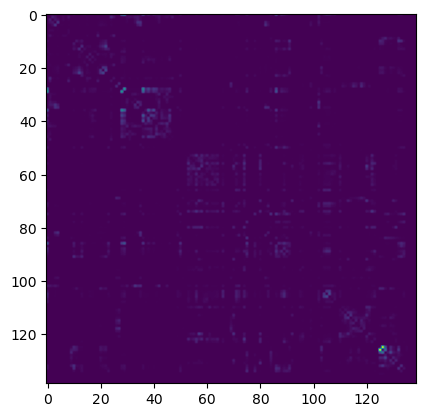

In [8]:
plt.figure()
plt.imshow(loaded_csv[0])